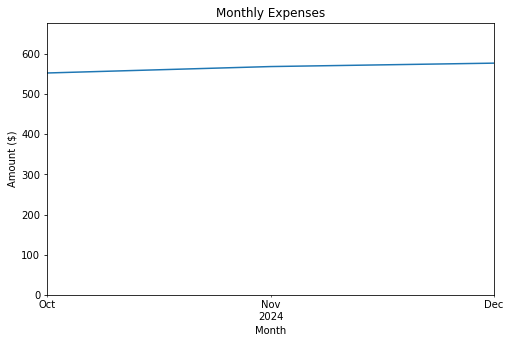

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, clear_output
import ipywidgets as widgets

# Sample expense data with entries spanning multiple months
expenses = [
    {"date": "2024-10-01", "category": "Food", "amount": 15.50},
    {"date": "2024-10-03", "category": "Entertainment", "amount": 25.00},
    {"date": "2024-10-05", "category": "Rent", "amount": 500.00},
    {"date": "2024-10-07", "category": "Food", "amount": 12.00},
    {"date": "2024-11-01", "category": "Food", "amount": 20.50},
    {"date": "2024-11-03", "category": "Entertainment", "amount": 30.00},
    {"date": "2024-11-05", "category": "Rent", "amount": 500.00},
    {"date": "2024-11-07", "category": "Food", "amount": 18.00},
    {"date": "2024-12-01", "category": "Food", "amount": 22.00},
    {"date": "2024-12-03", "category": "Entertainment", "amount": 40.00},
    {"date": "2024-12-05", "category": "Rent", "amount": 500.00},
    {"date": "2024-12-07", "category": "Food", "amount": 15.00},
]

# Convert to DataFrame for easier manipulation
df_expenses = pd.DataFrame(expenses)
df_expenses["date"] = pd.to_datetime(df_expenses["date"])

# Function to add a new expense entry
def add_expense(date, category, amount):
    global df_expenses
    # Convert date from MM-DD-YYYY format
    date_formatted = datetime.strptime(date, "%m-%d-%Y")
    new_expense = pd.DataFrame({"date": [date_formatted], "category": [category], "amount": [amount]})
    df_expenses = pd.concat([df_expenses, new_expense], ignore_index=True)
    output_text.value = "Expense added successfully!"

# Widgets for interactive inputs
date_widget = widgets.Text(value='10-27-2024', description='Date (MM-DD-YYYY):')
category_widget = widgets.Text(value='Entertainment', description='Category:')
amount_widget = widgets.FloatText(value=100.0, description='Amount:')
add_button = widgets.Button(description="Add Expense")
output_text = widgets.HTML()

# Function to call `add_expense` on button click
def on_add_button_clicked(b):
    add_expense(date_widget.value, category_widget.value, amount_widget.value)

add_button.on_click(on_add_button_clicked)

# Display Category Totals with Plot
def display_category_totals():
    clear_output(wait=True)  # Clears previous output
    category_totals = df_expenses.groupby("category")["amount"].sum()
    output_text.value = f"<b>Total expenses by category:</b><br>{category_totals.to_frame().to_html()}"
    plt.figure(figsize=(8, 5))
    category_totals.plot(kind="bar", title="Total Expenses by Category", ylabel="Amount ($)")
    plt.show()

# Display Monthly Totals with Plot
def display_monthly_totals():
    clear_output(wait=True)  # Clears previous output
    df_expenses["month"] = df_expenses["date"].dt.to_period("M")
    monthly_totals = df_expenses.groupby("month")["amount"].sum()
    output_text.value = f"<b>Monthly expenses:</b><br>{monthly_totals.to_frame().to_html()}"
    plt.figure(figsize=(8, 5))
    monthly_totals.plot(kind="line", title="Monthly Expenses", ylabel="Amount ($)", xlabel="Month")
    plt.ylim(0, monthly_totals.max() + 100)  # Adds a little buffer above the max value
    plt.show()

# Buttons to display summaries
category_button = widgets.Button(description="Show Category Totals")
monthly_button = widgets.Button(description="Show Monthly Totals")

category_button.on_click(lambda b: display_category_totals())
monthly_button.on_click(lambda b: display_monthly_totals())

# Layout the widgets
display(date_widget, category_widget, amount_widget, add_button, category_button, monthly_button, output_text)


In [3]:
add_expense()

TypeError: add_expense() missing 3 required positional arguments: 'date', 'category', and 'amount'